# To do:
- add other/ under test option for active material weight loading and ammend Li 2011, Xi 2014
- Add binder free/ additive free option and ammend Xi 2014

## CV: probably ignore 'reported' radio buttons, use presence/ absence of values as frequently missed

In [7]:
%matplotlib nbagg
import sys
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append("meta-characterisation-main")
# sys.path.append(r"C:\Users\engs2608\GitClone\meta-characterisation")
# sys.path.append(r"C:\Users\Admin\Documents\GitHub\meta-characterisation")
from MetaChecklist import MetaChecklistTab

from matplotlib.ticker import MultipleLocator

In [8]:
# save_path = r"C:\Users\engs2608\Dropbox\Apps\Overleaf\Meta-analyis 2 - characterisation\summary_graphics"
save_path = r"C:\Users\Admin\Dropbox\Apps\Overleaf\Meta-analyis 2 - characterisation\summary_graphics"

In [9]:
## Plot settings
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    if absolute > 0:
        return f"{pct:.1f}%" ##"\n({absolute:d} g)"

plt.rcParams.update({"xtick.direction": "in"})
plt.rcParams.update({"ytick.direction": "in"})
plt.rcParams.update({"xtick.top": True})
plt.rcParams.update({"ytick.right": True})

nmc_color = plt.cm.Dark2(2)
lis_color = plt.cm.Dark2(5)

nmc_light_palette = sns.light_palette(nmc_color)
lis_light_palette = sns.light_palette(lis_color)

In [10]:
## functions for searching for keywords in dataframes
def cont_keyword(df, keyword, column, case=True):
    return df[df[column].astype(str).str.contains(keyword, case)]

def cont_multi_keywords(df, list_of_keywords, column, case=True):
    return df[df[column].astype(str).str.contains("|".join(list_of_keywords), case)]

def excludes_keywords(df, list_of_keywords, column, case=False):
    return df[~df[column].astype(str).str.contains("|".join(list_of_keywords), case)]

In [11]:
# functions for easily making stacked bar charts
def bar_height_bottom(bars_below):
    return [(bar._y0+bar._height) for bar in bars_below]

def bar_height_mid(bars_to_label, x_loc):
    for bar in bars_to_label:
        if bar._x0+0.5*bar._width == x_loc:
            return bar._y0+0.5*bar._height


In [12]:
## Update label for figures
def figure_info(description, newline=True):
    from datetime import datetime
    df_entries = len(df)
    current_time = datetime.now().strftime("%D %H:%M")
    if newline == True:
        return "{} \nLast updated: {}, number of articles: {}".format(description, current_time, df_entries)
    else:
        return "{} Last updated: {}, number of articles: {}".format(description, current_time, df_entries)

# Data entry

- Zybert - reports volume of NMP and mass of electrode constituents
- Zybert - reports 0.05 C initial cycle to determine capacity
- Zybert - only 3 cycles each at higher rates, different cutoffs (either 4.4 or 4.6 V)
- Zybert - TGA+mass spec combined
- Zybert - particle size dist from DLS

- Wang 2024 - pouch and coin cell comparison
- Wang 2024: specified 1C = 2A (no link to material properties)
- Wang 2024: mixed discharge + charge rates (e.g. 0.1/3C)
- Wang 2024: thermal imaging of pouch cell at different rates
- Wang 2024 - DC IR (mOhm) values for each cathode

- Du 2022 SPAN - "The active material was mixed with carbon black and poly(vinylidene fluoride) (PVDF) in a ratio of 70 : 15 : 15 (wt %) in N- methyl-2-pyrrolidone (NMP, active material:solvent = 1 : 10, wt/wt)."
- Du 2022 SPAN - used 1M LiPF6 in EC DEC for SPAN
- Du 2022 specifies 22 degC
- Du 2022 - "Rate stability tests were also conducted on a BasyTech XCTS-LAB system starting with 0.5 C for 20 cycles to reach a rather stable stage, followed by 5 cycles at 0.1, 0.5, 1, 2, 4, 2, 1, 0.5, 0.1 C each. Finally, cells were run for another 20 cycles at 0.5 C. " - GITT also uses higher 0.5C for 10 cycles followed by 0.1C for 10 mins
- Du 2022 SPAN - galv in two electrode; CV in 3 electrode T cells, *from 0.45 to 1V*, with *GITT* from 0.45 V to 3
- Du 2022 UV vis on cycled electrode after 100 cycles, stopped when discharged using electrolyte as reference spectrum
- Du 2022 shows 1.5 mg/cm2 active in SI - "Cathode materials
with lower sulfur loading of 0.88 mg/cm2 displayed a discharge
capacity that was ca. 15 % higher than the one of cathodes
with higher mass loading, indicating that the thin coatings had
a better coating quality."
- Du 2022 - elemental analysis, may be separate from SEM

- Tsao SPAN - LiPF6 in SOL/DME, or EC/DEC+LiPF6

- Li 2022 hydroxide Li-S - 1.2mg/cm2 areal loading, but does not specify whether total or sulfur
-  Li 2022 hydroxide Li-S - " In order to make sure the adequate penetration of electrolyte into the electrode, cells were aged for several hours before testing."
-  Li 2022 hydroxide Li-S - separate CV curves with multiple rates for symmetrical cells (-1.5 to 1.5V)

- Viswanathan 2025 - ICP AES 
- Viswanathan 2025 - areal loading of 8 mg/cm2 unspecified for total vs. active?
- - Viswanathan 2025 - particle size distribution by measurement of SEM
- Viswanathan 2025 reports two different ECMs for different Li-rich/ non-rich systems
- Kim 2014 'All assembled cells were allowed to rest for at least 10 h at room temperature prior to electrochemical tests.'
- Kim 2014 - temperature tests at 55 degC
- Kim 2014 - GITT
- Kim 2014 specifies 1C at 160 mA/g, but reports capacities of 171, 164 mAh/g - potentially determined from initial slow cycles?
- Kim 2014 - diffusion from GITT, qualitative discussion of EIS Rct

- Tancin 2024 - specifies concentration of binder in solvent (1% CMC, 2% SBR) FOR ANODE PREP
- Tancin 2024 - example of thickness and drying! For graphite, used 200 um doctor blade on 10um copper foil (not subtracting thickness), resulting in dry thickness of 55um after drying, calendared to 20 um
- Tancin - CATHODE, "The electrode was doctor blade coated onto a 20 μm thick aluminum foil (MSE Pro) with a wet gap of 200 μm (not subtracting for Al foil thickness) at a speed of 25 mm s−1 and dried overnight in a vacuum oven at 120 ◦C. The coating thickness after calendaring was ≈ 70 μm thick. "
- Tancin 2024 - cells given 5 hr rest period after assembly
- Tancin assumes gravimetric capaity of 162 mAh/g for NMC
- Tancin 2024: CCCV using 1/33 current for upper cutoff
- Tancin - observes flattening after calendaring of NMC (?), but not specified in methods?? (may have been pre use, as using recycled materials)

- Jung 2021 - 'particle size analysis' method not specified; quantity of active/ cb/ binder not specified
- Jung 2021 - 'microstructures of NCM material' shown (SEM images), but not actually labelled as SEM
- Jung 2021 - do not reoport C rate or current. Label on plot says Li/NMC=1 used as N/P ratio?? quotes "discharge capacity of 180 mAh/g represented by a general NCM material"
- Jung 2021 - randomly says that Cd < 200 ppm, unclear how measured
- Bao 2017 - carbon paper current collector
- Bao 2017 - CV range and galvanostatic voltage ranges
- Kwon 2021 also uses different CV and galvanostatic ranges
- Kwon 2021 plateau potential differences reported, capacity at plateau?
- Kwon 2021 - CV RS reported and confirmation of linearity :)
- Kwon 2021 - freestanding, shows photo
- Bao 2017 - photos of dispersions being adsorbed (listed as optical/ in-situ)
- Bao 2017, no specific relaxation time before cycling, but OCV for 120 hour

- Gomez 2016: "The final solid content 48 - 50% slurries were prepared by mechanical mixer (RW 20 digital, IKA) at 600 rpm agitation rate. " (in NMP, with PEO binder)
- Gomez 2016: cells rested for 20 hours before cycling
- Gomez 2016: DSC of composites, not cell

- Li 2018 areal loading 0.8-1.2 mg/cm2 per electrode
- Li 2018 held at OCV for 12 h before tests
- Li 2018 photos of dispersions being adsorbed (listed as optical/ in-situ)

- Bao 2017 - add sulfur content in composite, add method of determining capacity

!!! - Viswanathan 2025 uses battery checklist! for JPS!

Also - compare active loading of sulfur vs. NMC to support point about 'higher carbon usage' in explanation of porosity

In [13]:
meta = MetaChecklistTab(test=False)
meta.tab

In [8]:
len(df)

NameError: name 'df' is not defined

# Notes to compare:
- Does CV range match galvanostatic range?

# Sort by cathode material

In [17]:
df = pd.read_csv("beta_database_3.csv", index_col=0)

cathode_column_names = {"NMC": [name for name in df.columns if "ChecklistCellFormat" in name and "NMC" in name],
                        "Sulfur": [name for name in df.columns if "ChecklistCellFormat" in name and "Sulfur" in name]}

cathode_sort = dict([(keys,
                      pd.concat([df.loc[df[name]==True] for name in values]))
                    for keys, values in cathode_column_names.items()])

cathode_sort = dict([(keys, values.drop_duplicates()) for keys, values in cathode_sort.items()])

material_count = dict([(keys, len(values)) for keys, values in cathode_sort.items()])

In [27]:
df.loc[df["Article_DOI"]=="10.1039/C4TA00523F"]

,Article_First author,Article_Year,Article_Optional label,Article_DOI,concat_name,ChecklistMeasurementCondition_Temperature,ChecklistMeasurementCondition_Theoretical capacity active material,ChecklistMeasurementCondition_Theoretical capacity areal,ChecklistMeasurementCondition_Theoretical capacity cell,ChecklistMeasurementCondition_Theoretical capacity slow,...,Characterisation_Area porosity:Unspecified PSD:raw materials,Characterisation_Area porosity:Unspecified PSD:composite,Characterisation_Area porosity:Unspecified PSD:electrode,Characterisation_Area porosity:Unspecified PSD:in-situ/ operando,Characterisation_Area porosity:Unspecified PSD:post mortem/ ex-situ,Characterisation_Electrode properties:TOF SIMS:raw materials,Characterisation_Electrode properties:TOF SIMS:composite,Characterisation_Electrode properties:TOF SIMS:electrode,Characterisation_Electrode properties:TOF SIMS:in-situ/ operando,Characterisation_Electrode properties:TOF SIMS:post mortem/ ex-situ


In [19]:
df

,Article_First author,Article_Year,Article_Optional label,Article_DOI,concat_name,ChecklistMeasurementCondition_Temperature,ChecklistMeasurementCondition_Theoretical capacity active material,ChecklistMeasurementCondition_Theoretical capacity areal,ChecklistMeasurementCondition_Theoretical capacity cell,ChecklistMeasurementCondition_Theoretical capacity slow,...,Characterisation_Area porosity:Unspecified PSD:raw materials,Characterisation_Area porosity:Unspecified PSD:composite,Characterisation_Area porosity:Unspecified PSD:electrode,Characterisation_Area porosity:Unspecified PSD:in-situ/ operando,Characterisation_Area porosity:Unspecified PSD:post mortem/ ex-situ,Characterisation_Electrode properties:TOF SIMS:raw materials,Characterisation_Electrode properties:TOF SIMS:composite,Characterisation_Electrode properties:TOF SIMS:electrode,Characterisation_Electrode properties:TOF SIMS:in-situ/ operando,Characterisation_Electrode properties:TOF SIMS:post mortem/ ex-situ
0,Yabuuchi,2003.0,novel lithium insertion,10.1016/S0378-7753(03)00173-3,Yabuuchi 2003 novel lithium insertion,Not reported,True,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Bree,2025.0,Practical pathways,10.1021/acs.energyfuels.4c06201,Bree 2025 Practical pathways,Not reported,True,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ji,2009.0,highly ordered,10.1038/NMAT2460,Ji 2009 highly ordered,Room temp,True,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Lin,2014.0,Surface reconstruction,10.1038/ncomms4529,Lin 2014 Surface reconstruction,Not reported,True,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tran,2006.0,Positive electrode materials,10.1149/1.2138573,Tran 2006 Positive electrode materials,Not reported,True,False,False,False,...,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,Kim,2014.0,unexpected,10.1016/j.jpowsour.2013.12.119,Kim 2014 unexpected,Constant - non room temp,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
136,Tancin,2024.0,direct reuse,10.1016/j.jpowsour.2023.234027,Tancin 2024 direct reuse,Not reported,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
137,Jung,2021.0,recycled NMC,10.24425/amm.2021.136411,Jung 2021 recycled NMC,Not reported,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
138,Bao,2017.0,mxene RGO,10.1002/chem.201702387,Bao 2017 mxene RGO,Room temp,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [23]:
## Checking that all articles contain cathode information
df["Article_DOI"].loc[(df["Article_DOI"].isin(cathode_sort["NMC"]["Article_DOI"])==False) &
                      (df["Article_DOI"].isin(cathode_sort["Sulfur"]["Article_DOI"])==False)]

Series([], Name: Article_DOI, dtype: object)

<IPython.core.display.Javascript object>


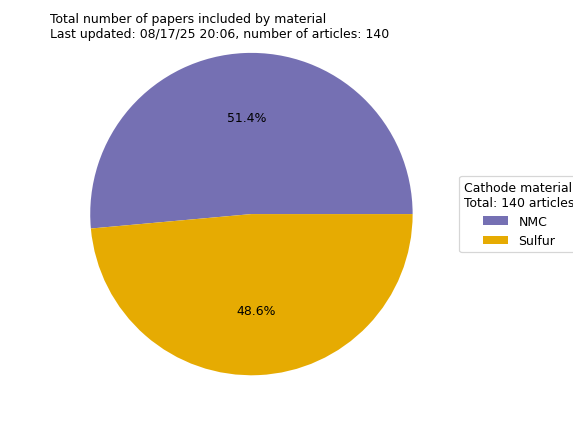

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [29]:
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie([*material_count.values()],
                                  autopct=lambda pct: func(pct, [*material_count.values()]),
                                  colors=[nmc_color, lis_color])

ax.legend(wedges, [*material_count.keys()],
          title="Cathode material\nTotal: {} articles".format(np.sum([*material_count.values()])), bbox_to_anchor=(1, 0.5), loc="center left")

plt.tight_layout()
plt.annotate(figure_info("Total number of papers included by material"), (0, 1), xycoords=ax.transAxes, va="top")
plt.savefig(os.path.join(save_path, "Pie_cathode_materials.eps"), bbox_inches="tight")

# Reporting scales

In [30]:
[name for name in df.columns if "scale" in name]

['ChecklistElectrodeProcessing_Production scale',
 'ChecklistElectrodeProcessing_Production scale comment']

In [31]:
material = "Sulfur"

lis_scale_df = cathode_sort[material][['ChecklistElectrodeProcessing_Production scale', 'ChecklistElectrodeProcessing_Production scale comment']]
lis_scale_df.columns = [name.split("_")[1] for name in lis_scale_df.columns]

total_sulfur_scale_reported = len(lis_scale_df.loc[lis_scale_df["Production scale"]==True])
sulfur_scale_sulfur_reported = cont_keyword(lis_scale_df, column="Production scale comment", keyword="sulfur")
sulfur_scale_precursor_reported = cont_keyword(lis_scale_df, column="Production scale comment", keyword="precursor")
sulfur_scale_nonspec_reported = total_sulfur_scale_reported-len(sulfur_scale_sulfur_reported)-len(sulfur_scale_precursor_reported)

In [32]:
material = "NMC"

nmc_scale_df = cathode_sort[material][['ChecklistElectrodeProcessing_Production scale', 'ChecklistElectrodeProcessing_Production scale comment']]
nmc_scale_df.columns = [name.split("_")[1] for name in nmc_scale_df.columns]

total_nmc_scale_reported = len(nmc_scale_df.loc[nmc_scale_df["Production scale"]==True])
nmc_scale_nmc_reported = cont_keyword(nmc_scale_df, column="Production scale comment", keyword="NMC")
nmc_scale_precursor_reported = cont_keyword(nmc_scale_df, column="Production scale comment", keyword="precursor")
nmc_scale_nonspec_reported = total_nmc_scale_reported-len(nmc_scale_nmc_reported)-len(nmc_scale_precursor_reported)



In [33]:
sulfur_scale_sulfur_reported

,Production scale,Production scale comment
2,True,"1g CMK-3, 2.33g sulfur"
16,True,"5.4 g sulfur, 1.0 g carbon, volumes/ masses of..."
18,True,"0.1 g sulfur, 30mL toluene,"
20,True,"22.5 mg sulfur, 0.5 g graphite precursor"
37,True,~0.1g sulfur
95,True,1.4g sulfur and 0.6g KB
110,True,"10s g precursor, and 255 mg sulfur solution"
111,True,"mg, mL quantity precursors, 1 mg sulfur loadin..."
117,True,"0.6g, 2.1-15mL precursors; electrode content 0..."
118,True,"9g sulfur, 1g DVB in electrode polymer"


<IPython.core.display.Javascript object>


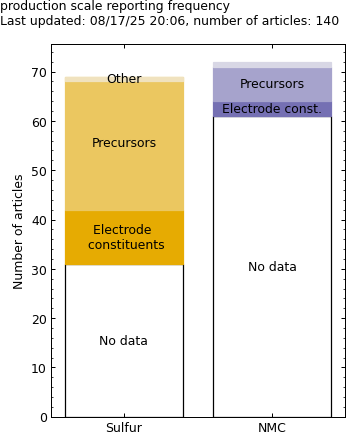

Text(0, 1, 'production scale reporting frequency \nLast updated: 08/17/25 20:06, number of articles: 140')

In [34]:
fig, ax = plt.subplots(figsize=(4, 5))
no_scale_report = ax.bar(x=[0, 1], height=[len(lis_scale_df.loc[lis_scale_df["Production scale"]==False]),
                                      len(nmc_scale_df.loc[nmc_scale_df["Production scale"]==False])], color="white", edgecolor="black")

electrode_scale_report = ax.bar(x=[0, 1], height=[len(sulfur_scale_sulfur_reported), len(nmc_scale_nmc_reported)], 
       bottom=bar_height_bottom(no_scale_report), color=[lis_light_palette[5], nmc_light_palette[5]],
       edgecolor=[lis_light_palette[5], nmc_light_palette[5]])

precursor_scale_report = ax.bar(x=[0, 1], height=[len(sulfur_scale_precursor_reported), len(nmc_scale_precursor_reported)],
                                bottom=bar_height_bottom(electrode_scale_report), color=[lis_light_palette[3], nmc_light_palette[3]],
                                edgecolor=[lis_light_palette[3], nmc_light_palette[3]])

other_scale_report = ax.bar(x=[0, 1], height=[sulfur_scale_nonspec_reported, nmc_scale_nonspec_reported],
                            bottom=bar_height_bottom(precursor_scale_report), color=[lis_light_palette[1], nmc_light_palette[1]],
                                edgecolor=[lis_light_palette[1], nmc_light_palette[1]])

ax.annotate("No data", (0, bar_height_mid(no_scale_report, 0)), va="center", ha="center")
ax.annotate("No data", (1, bar_height_mid(no_scale_report, 1)), va="center", ha="center")

ax.annotate("Electrode \n constituents", (0, bar_height_mid(electrode_scale_report, 0)), va="center", ha="center")
ax.annotate("Electrode const.", (1, bar_height_mid(electrode_scale_report, 1)), va="center", ha="center")

ax.annotate("Precursors", (0, bar_height_mid(precursor_scale_report, 0)), va="center", ha="center")
ax.annotate("Precursors", (1, bar_height_mid(precursor_scale_report, 1)), va="center", ha="center")

ax.annotate("Other", (0, bar_height_mid(other_scale_report, 0)), va="center", ha="center")

# ax.set_ylim([0, 60])
ax.set_xticks([0, 1])
ax.set_xticklabels(["Sulfur", "NMC"])

ax.set_ylabel("Number of articles")

ax.yaxis.set_minor_locator   (MultipleLocator(2))
plt.tight_layout()

fig.subplots_adjust(top=0.9)
fig.text(s=figure_info("production scale reporting frequency"), x=0, y=1, va="top")
# plt.savefig(os.path.join(save_path, "production_scale_reporting.eps"), bbox_inches="tight")

# Thickness and areal loading

In [35]:
thickness_columns = ["Article_DOI",
    'ChecklistElectrodeProcessing_Electrode thickness',
                      'ChecklistElectrodeProcessing_Electrode how measured',
                      'ChecklistElectrodeProcessing_Calendered']
areal_loading_columns = ["Article_DOI", 'ChecklistElectrodeProcessing_Active material areal',
                         'ChecklistElectrodeProcessing_Electrode mass loading']

In [36]:
sulfur_area_reported = cathode_sort["Sulfur"][areal_loading_columns]
sulfur_area_active = sulfur_area_reported.loc[(sulfur_area_reported["ChecklistElectrodeProcessing_Active material areal"] != 0)]
sulfur_electrode_mass = cont_multi_keywords(sulfur_area_reported, list_of_keywords=[str(idx) for idx in range(0, 9)], column="ChecklistElectrodeProcessing_Electrode mass loading")

In [37]:
sulfur_thickness_reported = cont_multi_keywords(cathode_sort["Sulfur"][thickness_columns], list_of_keywords=[str(idx) for idx in range(0, 9)]+["m", "r", "0"], column="ChecklistElectrodeProcessing_Electrode thickness")
sulfur_thickness_not_reported = cathode_sort["Sulfur"][cathode_sort["Sulfur"]["Article_DOI"].isin(sulfur_thickness_reported["Article_DOI"])==False]
nmc_thickness_reported = cont_multi_keywords(cathode_sort["NMC"][thickness_columns], list_of_keywords=[str(idx) for idx in range(0, 9)]+["m", "r", "0"], column="ChecklistElectrodeProcessing_Electrode thickness")
nmc_thickness_not_reported = cathode_sort["NMC"][cathode_sort["NMC"]["Article_DOI"].isin(nmc_thickness_reported["Article_DOI"])==False]


nmc_calendared = cathode_sort["NMC"].loc[cathode_sort["NMC"]["ChecklistElectrodeProcessing_Calendered"]==True]
sulfur_calendared = cathode_sort["Sulfur"].loc[cathode_sort["Sulfur"]["ChecklistElectrodeProcessing_Calendered"]==True]

sulfur_thickness_AND_calendared = sulfur_thickness_reported[sulfur_thickness_reported["Article_DOI"].isin(sulfur_calendared["Article_DOI"])]
sulfur_thickness_NOT_calendared = sulfur_thickness_reported[sulfur_thickness_reported["Article_DOI"].isin(sulfur_calendared["Article_DOI"])==False]

nmc_thickness_AND_calendared = nmc_thickness_reported[nmc_thickness_reported["Article_DOI"].isin(nmc_calendared["Article_DOI"])]
nmc_thickness_NOT_calendared = nmc_thickness_reported[nmc_thickness_reported["Article_DOI"].isin(nmc_calendared["Article_DOI"])==False]


In [38]:
sulfur_a

NameError: name 'sulfur_a' is not defined

In [ ]:
cathode_sort["Sulfur"][cathode_sort["Sulfur"]["Article_DOI"].isin(sulfur_thickness_reported["Article_DOI"])==False]

In [ ]:
sulfur_thickness_not_reported.loc[sulfur_thickness_not_reported["Article_DOI"]=="10.1039/C4NR00326H"]

In [ ]:
nmc_thickness_reported

In [39]:
len(nmc_thickness_reported)+len(nmc_thickness_not_reported)

72

In [40]:
nmc_nothickness_AND_calendared = nmc_calendared[nmc_calendared["Article_DOI"].isin(nmc_thickness_not_reported["Article_DOI"])]

sulfur_nothickness_AND_calendared = sulfur_calendared[sulfur_calendared["Article_DOI"].isin(sulfur_thickness_not_reported["Article_DOI"])]

<IPython.core.display.Javascript object>


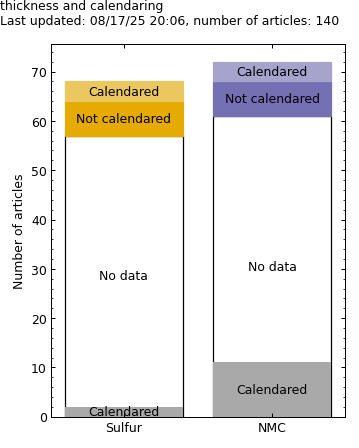

Text(0, 1, 'thickness and calendaring \nLast updated: 08/17/25 20:06, number of articles: 140')

In [41]:
fig, ax = plt.subplots(figsize=(4, 5))
no_thickness = ax.bar([0, 1], [len(sulfur_thickness_not_reported), len(nmc_thickness_not_reported)], color="white", edgecolor="black")

nothickness_yescalendar = ax.bar([0, 1], [len(sulfur_nothickness_AND_calendared), len(nmc_nothickness_AND_calendared)],
                                 color="darkgrey")

thickness_no_calendar = ax.bar([0, 1], [len(sulfur_thickness_NOT_calendared), len(nmc_thickness_NOT_calendared)], 
                               bottom=bar_height_bottom(no_thickness), 
                               color=[lis_light_palette[5], nmc_light_palette[5]],
                               edgecolor=[lis_light_palette[5], nmc_light_palette[5]])
thickness_yes_calendar = ax.bar([0, 1], [len(sulfur_thickness_AND_calendared), len(nmc_thickness_AND_calendared)], 
                               bottom=bar_height_bottom(thickness_no_calendar),
                                color=[lis_light_palette[3], nmc_light_palette[3]],
                               edgecolor=[lis_light_palette[3], nmc_light_palette[3]])



ax.annotate("No data", (0, bar_height_mid(no_thickness, 0)), va="center", ha="center")
ax.annotate("No data", (1, bar_height_mid(no_thickness, 1)), va="center", ha="center")

for xo in [0, 1]:
    ax.annotate("Calendared", (xo, bar_height_mid(thickness_yes_calendar, xo)), va="center", ha="center")
    ax.annotate("Not calendared", (xo, bar_height_mid(thickness_no_calendar, xo)), va="center", ha="center")
    ax.annotate("Calendared", (xo, bar_height_mid(nothickness_yescalendar, xo)), va="center", ha="center")

ax.set_ylim([0, None])
ax.set_xticks([0, 1])
ax.set_xticklabels(["Sulfur", "NMC"])

ax.set_ylabel("Number of articles")

ax.yaxis.set_minor_locator(MultipleLocator(2))
plt.tight_layout()

fig.subplots_adjust(top=0.9)
fig.text(s=figure_info("thickness and calendaring"), x=0, y=1, va="top")
# plt.savefig(os.path.join(save_path, "Thickness_calendaring.eps"), bbox_inches="tight")

# TGA

In [26]:
material = "Sulfur"

def make_tga_df(material):
    tga_df = cathode_sort[material][[name for name in df.columns if "TGA" in name]]
    tga_df.columns = [name.split(":")[-1] for name in tga_df.columns]
    return tga_df[["raw materials", "composite"]]

sulfur_tga_df_raw_comp = make_tga_df("Sulfur")
sulfur_tga_raw_materials = sulfur_tga_df_raw_comp.loc[(sulfur_tga_df_raw_comp["raw materials"]==True) & (sulfur_tga_df_raw_comp["composite"]==False)]
sulfur_tga_composite = sulfur_tga_df_raw_comp.loc[(sulfur_tga_df_raw_comp["raw materials"]==False) & (sulfur_tga_df_raw_comp["composite"]==True)]
sulfur_tga_both = sulfur_tga_df_raw_comp.loc[(sulfur_tga_df_raw_comp["raw materials"]==True) & (sulfur_tga_df_raw_comp["composite"]==True)]
sulfur_tga_none = sulfur_tga_df_raw_comp.loc[(sulfur_tga_df_raw_comp["raw materials"]==False) & (sulfur_tga_df_raw_comp["composite"]==False)]

In [27]:
nmc_tga_df_raw_comp = make_tga_df("NMC")
nmc_tga_raw_materials = nmc_tga_df_raw_comp.loc[nmc_tga_df_raw_comp["raw materials"]==True]
nmc_tga_none = nmc_tga_df_raw_comp.loc[nmc_tga_df_raw_comp["raw materials"]==False]

bar_bottom = vars(lis_nmc_none[0])["_y0"]
bar_top = vars(lis_nmc_none[0])["_height"]

<IPython.core.display.Javascript object>


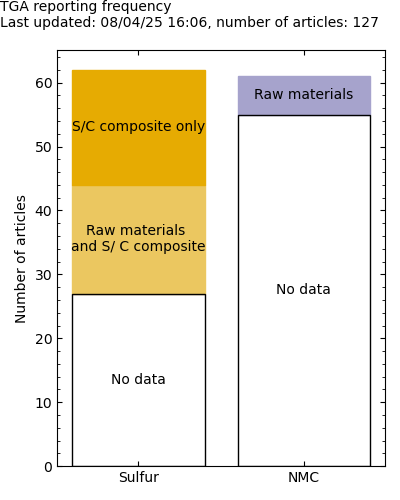

Text(0, 1, 'TGA reporting frequency \nLast updated: 08/04/25 16:06, number of articles: 127')

In [29]:
fig, ax = plt.subplots(figsize=(4, 5))

lis_nmc_none = ax.bar(height=[len(sulfur_tga_none), len(nmc_tga_none)], x=[0, 1],
                      color="none", edgecolor="k", zorder=999)


ax.annotate("No data", (0, bar_height_mid(lis_nmc_none, 0)), va="center", ha="center")
ax.annotate("No data", (1, bar_height_mid(lis_nmc_none, 1)), va="center", ha="center")

lis_nmc_raw = ax.bar(height=[len(sulfur_tga_raw_materials), len(nmc_tga_raw_materials)], x=[0, 1],
       bottom=bar_height_bottom(lis_nmc_none),
       color=nmc_light_palette[3], edgecolor=nmc_light_palette[3])
ax.annotate("Raw materials", (1, bar_height_mid(lis_nmc_raw, 1)), va="center", ha="center")

lis_nmc_both = ax.bar(height=[len(sulfur_tga_both), np.nan], x=[0, 1], 
       bottom=bar_height_bottom(lis_nmc_raw),
       color=lis_light_palette[3], edgecolor=lis_light_palette[3])
ax.annotate("Raw materials \nand S/ C composite", (0, bar_height_mid(lis_nmc_both, 0)), va="center", ha="center")

lis_composite = ax.bar(height=[len(sulfur_tga_composite), np.nan], x=[0, 1], 
       bottom=bar_height_bottom(lis_nmc_both),
       color=lis_light_palette[5], edgecolor=lis_light_palette[5])
ax.annotate("S/C composite only", (0, bar_height_mid(lis_composite, 0)), va="center", ha="center")

ax.set_ylim([0, None])
ax.set_xticks([0, 1])
ax.set_xticklabels(["Sulfur", "NMC"])

ax.set_ylabel("Number of articles")

ax.yaxis.set_minor_locator(MultipleLocator(2))
plt.tight_layout()

fig.subplots_adjust(top=0.9)
fig.text(s=figure_info("TGA reporting frequency"), x=0, y=1, va="top")
# plt.savefig(os.path.join(os.path.join(save_path, "TGA_reporting.eps")), bbox_inches="tight")

In [30]:
sulfur_tga_both

,raw materials,composite
6,True,True
19,True,True
20,True,True
23,True,True
33,True,True
35,True,True
41,True,True
52,True,True
53,True,True
54,True,True


In [ ]:
sulfur_tga_composite.isin(sulfur_tga_raw_materials)

In [ ]:
sulfur_tga_composite

# Electrode processing metrics

- Zhao 2020 Starfish appears to skip electrode preparation, only composite/ powder (grinding and heating mentioned as last step before cell prep)

In [ ]:
cathode_sort["Sulfur"][['ChecklistElectrodeProcessing_Electrode mass comp Binder',
                        'ChecklistElectrodeProcessing_Electrode mass comp Active',
                        'ChecklistElectrodeProcessing_Electrode mass comp Additive']]

# CV reporting

In [31]:
material = "NMC"

def CV_reporting(material):
    CV_reported_same = cathode_sort[material].loc[(cathode_sort[material]["ChecklistCV_Sweep rate min"]==cathode_sort[material]["ChecklistCV_Sweep rate max"]) & 
                            (cathode_sort[material]["ChecklistCV_Sweep rate min"]>0)]
    CV_reported_vary = cathode_sort[material].loc[(cathode_sort[material]["ChecklistCV_Sweep rate min"]!=cathode_sort[material]["ChecklistCV_Sweep rate max"]) & 
                            (cathode_sort[material]["ChecklistCV_Sweep rate min"]>0)]

    CV_unreported = cathode_sort[material].loc[cathode_sort[material]["Article_DOI"].isin(CV_reported_same["Article_DOI"])==False].loc[cathode_sort[material]["Article_DOI"].isin(CV_reported_vary["Article_DOI"])==False]
    
    return {"reported_same": CV_reported_same["ChecklistCV_Sweep rate min"].to_numpy(),
            "reported_vary": CV_reported_vary[["ChecklistCV_Sweep rate min", "ChecklistCV_Sweep rate max"]].to_numpy(),
            "unreported": len(CV_unreported)}

In [32]:
cv_nmc = CV_reporting("NMC")
cv_sulfur = CV_reporting("Sulfur")

In [33]:
import seaborn as sns

In [34]:
nmc_gradient = sns.light_palette(nmc_color)
sulfur_gradient = sns.light_palette(lis_color)

<IPython.core.display.Javascript object>


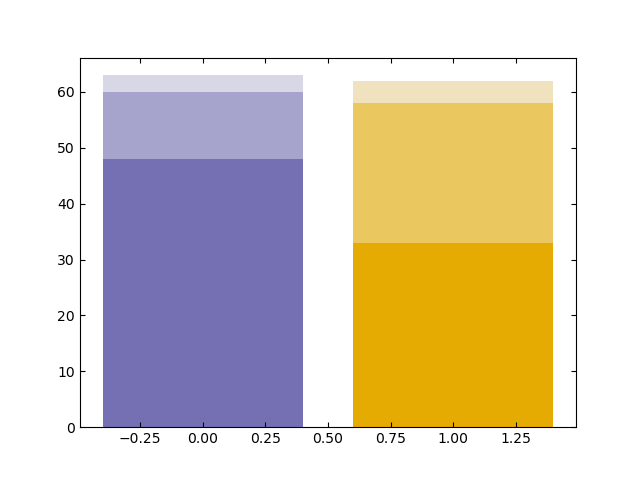

<BarContainer object of 2 artists>

In [35]:
fig, ax = plt.subplots()

unreported = ax.bar(height=[cv_nmc["unreported"], cv_sulfur["unreported"]], x=[0, 1],
                    color=[nmc_gradient[-1], sulfur_gradient[-1]])

constant_report = ax.bar(height=[cv_nmc["reported_same"].shape[0], cv_sulfur["reported_same"].shape[0]], x=[0, 1],
                         bottom=[cv_nmc["unreported"], cv_sulfur["unreported"]],
                    color=[nmc_gradient[-3], sulfur_gradient[-3]])


ax.bar(height=[cv_nmc["reported_vary"].shape[0], cv_sulfur["reported_vary"].shape[0]], x=[0, 1],
                         bottom=[cv_nmc["unreported"]+cv_nmc["reported_same"].shape[0],
                                 cv_sulfur["unreported"]+cv_sulfur["reported_same"].shape[0]],
                    color=[nmc_gradient[-5], sulfur_gradient[-5]]
                  )




In [36]:
vars(unreported)

{'patches': [<matplotlib.patches.Rectangle at 0x2b024a91d00>,
 'errorbar': None,
 'datavalues': array([48, 33]),
 'orientation': 'vertical',
 '_callbacks': <matplotlib.cbook.CallbackRegistry at 0x2b024a92000>,
 '_remove_method': <function list.remove(value, /)>,
 '_label': '_container0',
 'stale': True}

# EC temperature

In [37]:
unique_temps = np.unique(df["ChecklistMeasurementCondition_Temperature"].to_numpy(dtype=str))
sulfur_temp_counts = dict([(unique_temp_val, len([name for name in cathode_sort["Sulfur"]["ChecklistMeasurementCondition_Temperature"] if name == unique_temp_val]))
                           for unique_temp_val in unique_temps])
nmc_temp_counts = dict([(unique_temp_val, len([name for name in cathode_sort["NMC"]["ChecklistMeasurementCondition_Temperature"] if name == unique_temp_val]))
                           for unique_temp_val in unique_temps])

if "nan" in sulfur_temp_counts.keys():
    sulfur_temp_counts["Not reported"] = sulfur_temp_counts["Not reported"]+sulfur_temp_counts["nan"]
    sulfur_temp_counts.pop("nan")

if "nan" in nmc_temp_counts.keys():
    nmc_temp_counts["Not reported"] = nmc_temp_counts["Not reported"]+nmc_temp_counts["nan"]
    nmc_temp_counts.pop("nan")

In [38]:
sulfur_temp_counts.keys()

dict_keys(['Constant - non room temp', 'Not reported', 'Room temp', 'Under test'])

<IPython.core.display.Javascript object>


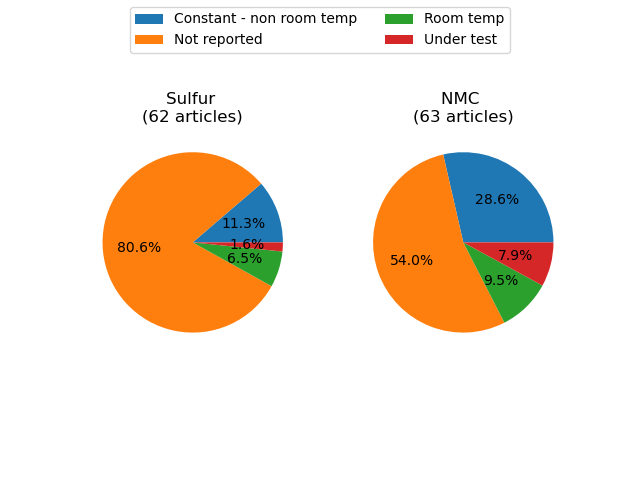

In [40]:
fig, (axes) = plt.subplots(1, 2)

# fig.suptitle("Frequency of cycling temperature reporting")

'''
wedges, texts, autotexts = ax.pie([*material_count.values()],
                                  autopct=lambda pct: func(pct, [*material_count.values()]),
                                  colors=[nmc_color, lis_color])
# 
'''

axes[0].set_title("Sulfur \n({} articles)".format(np.sum([*sulfur_temp_counts.values()])))
wedges, texts, autotexts = axes[0].pie([*sulfur_temp_counts.values()],
                                       autopct=lambda pct: func(pct, [*sulfur_temp_counts.values()]))

axes[1].set_title("NMC \n({} articles)".format(np.sum([*nmc_temp_counts.values()])))
wedges, texts, autotexts = axes[1].pie([*nmc_temp_counts.values()],
                                       autopct=lambda pct: func(pct, [*nmc_temp_counts.values()]))
fig.legend(labels=[*nmc_temp_counts.keys()], loc="upper center", ncol=2)

# plt.savefig(os.path.join(save_path, "Frequency_of_temperature_reporting.eps"), bbox_inches="tight")

In [41]:
 checklist_columns = [
    #"ChecklistMeasurementCondition_Temperature", ## Non-boolean
                     "ChecklistMeasurementCondition_Theoretical capacity active material",
                     "ChecklistMeasurementCondition_Theoretical capacity areal",
                     'ChecklistMeasurementCondition_Theoretical capacity cell',
                     'ChecklistMeasurementCondition_Theoretical capacity slow',
#                      'ChecklistCellFormat_Electrolyte volume reported', ## non-boolean
                     'ChecklistCellFormat_Electrolyte ratio reported',
                     'ChecklistElectrodeProcessing_Production scale',
                     'ChecklistElectrodeProcessing_Using commercial electrode', ## Non-boolean
                     'ChecklistElectrodeProcessing_Electrode mass comp Binder',
                     'ChecklistElectrodeProcessing_Electrode mass comp Additive',
                     'ChecklistElectrodeProcessing_Electrode mass comp Active',
                     'ChecklistElectrodeProcessing_Electrode mass comp Solid content slurry',
                     'ChecklistElectrodeProcessing_Electrode thickness',
                    #  'ChecklistElectrodeProcessing_Calendered',
                     'ChecklistElectrodeProcessing_Active material areal',
                     'ChecklistElectrodeProcessing_Active material fractional',
                     'ChecklistGalvanostatic_Voltage min',
                    #  'ChecklistGalvanostatic_Voltage max',
                    #  'ChecklistGalvanostatic_Different voltage range',
                    #  'ChecklistGalvanostatic_Voltage range NA',
                     'ChecklistGalvanostatic_Pre-activation used',
                    #  'ChecklistGalvanostatic_Pre-activation rate',
                    #  'ChecklistGalvanostatic_Pre-activation n cycles',
                    #  'ChecklistGalvanostatic_Pre-activation other',
                    #  'ChecklistGalvanostatic_Pre-activation NA',
                     'ChecklistGalvanostatic_C Rate min',
                    #  'ChecklistGalvanostatic_C Rate max',
                    #  'ChecklistGalvanostatic_Current density min',
                    #  'ChecklistGalvanostatic_Current density max',
                    #  'ChecklistGalvanostatic_Current density report',
                     'ChecklistGalvanostatic_Constant voltage charge',
                    #  'ChecklistGalvanostatic_Constant voltage discharge',
                     'ChecklistGalvanostatic_Multiple cells',
                     'ChecklistCV_Reported',
                     'ChecklistCV_Voltage min',
                    #  'ChecklistCV_Voltage max',
                     'ChecklistCV_Sweep rate min',
                    #  'ChecklistCV_Sweep rate max',
                     'ChecklistCV_Linear scan current',
                     'ChecklistEIS_Reported',
                     'ChecklistEIS_ECM',
                     'ChecklistElectrodeProcessing_Electrode mass loading'] ## TODO - may take numerical value rather than boolean!
    
    
checklist_capacity = ["ChecklistMeasurementCondition_Theoretical capacity active material",
                     "ChecklistMeasurementCondition_Theoretical capacity areal",
                     'ChecklistMeasurementCondition_Theoretical capacity cell',
                     'ChecklistMeasurementCondition_Theoretical capacity slow']

IndentationError: unexpected indent (2643177359.py, line 1)

In [42]:
capacity_reported = dict([(col, df.loc[df[col]==True]) for col in checklist_capacity])

NameError: name 'checklist_capacity' is not defined

In [43]:
capacity_metric_unreported = np.all(np.vstack([df.isin(capacity_reported[col])["Article_DOI"].to_numpy()
 for col in checklist_capacity])==False, axis=0)

NameError: name 'checklist_capacity' is not defined

In [44]:
class ReportingBinary(object):
    def __init__(self, df, cathode_sort, material):
        
        checklist_columns = [
    #"ChecklistMeasurementCondition_Temperature", ## Non-boolean
                     "ChecklistMeasurementCondition_Theoretical capacity active material",
                     "ChecklistMeasurementCondition_Theoretical capacity areal",
                     'ChecklistMeasurementCondition_Theoretical capacity cell',
                     'ChecklistMeasurementCondition_Theoretical capacity slow',
#                      'ChecklistCellFormat_Electrolyte volume reported', ## non-boolean
                     'ChecklistCellFormat_Electrolyte ratio reported',
                     'ChecklistElectrodeProcessing_Production scale',
                     'ChecklistElectrodeProcessing_Using commercial electrode', ## Non-boolean
                     'ChecklistElectrodeProcessing_Electrode mass comp Binder',
                     'ChecklistElectrodeProcessing_Electrode mass comp Additive',
                     'ChecklistElectrodeProcessing_Electrode mass comp Active',
                     'ChecklistElectrodeProcessing_Electrode mass comp Solid content slurry',
                     'ChecklistElectrodeProcessing_Electrode thickness',
                    #  'ChecklistElectrodeProcessing_Calendered',
                     'ChecklistElectrodeProcessing_Active material areal',
                     'ChecklistElectrodeProcessing_Active material fractional',
                     'ChecklistGalvanostatic_Voltage min',
                    #  'ChecklistGalvanostatic_Voltage max',
                    #  'ChecklistGalvanostatic_Different voltage range',
                    #  'ChecklistGalvanostatic_Voltage range NA',
                     'ChecklistGalvanostatic_Pre-activation used',
                    #  'ChecklistGalvanostatic_Pre-activation rate',
                    #  'ChecklistGalvanostatic_Pre-activation n cycles',
                    #  'ChecklistGalvanostatic_Pre-activation other',
                    #  'ChecklistGalvanostatic_Pre-activation NA',
                     'ChecklistGalvanostatic_C Rate min',
                    #  'ChecklistGalvanostatic_C Rate max',
                    #  'ChecklistGalvanostatic_Current density min',
                    #  'ChecklistGalvanostatic_Current density max',
                    #  'ChecklistGalvanostatic_Current density report',
                     'ChecklistGalvanostatic_Constant voltage charge',
                    #  'ChecklistGalvanostatic_Constant voltage discharge',
                     'ChecklistGalvanostatic_Multiple cells',
                     'ChecklistCV_Reported',
                     'ChecklistCV_Voltage min',
                    #  'ChecklistCV_Voltage max',
                     'ChecklistCV_Sweep rate min',
                    #  'ChecklistCV_Sweep rate max',
                     'ChecklistCV_Linear scan current',
                     'ChecklistEIS_Reported',
                     'ChecklistEIS_ECM',
                     'ChecklistElectrodeProcessing_Electrode mass loading'] ## TODO - may take numerical value rather than boolean!
        
        binary_yn = df[checklist_columns].to_numpy()==True
        reporting_true = np.array(cathode_sort[material].sort_values(by=["Article_Year"], axis=0)[checklist_columns].to_numpy())
        reporting_true_binary = reporting_true==True
        reporting_years = np.array(cathode_sort[material].sort_values(by=["Article_Year"], axis=0)["Article_Year"])
        year_values, year_idx = np.unique(reporting_years, return_index=True)

        self._checklist_columns = checklist_columns
        self.binary_yn = binary_yn
        self.reporting_true_binary = reporting_true_binary
        self.year_values = year_values
        self.year_idx = year_idx     
        print("Fix reporting_true line to accept numerical values (currently only takes boolean True)")
        
    def make_heatmap(self, cmap):
        fig, ax = plt.subplots()
        ax.imshow(np.array(self.reporting_true_binary.T), cmap=cmap)

        ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)

        ax.set_xticks(self.year_idx)
        ax.set_xticklabels(np.array(self.year_values, dtype=int), rotation=90)

        ax.set_yticks(np.arange(len(self._checklist_columns)))
        ax.set_yticklabels([name.split("_")[1] for name in self._checklist_columns])
        return fig, ax

Fix reporting_true line to accept numerical values (currently only takes boolean True)


<IPython.core.display.Javascript object>


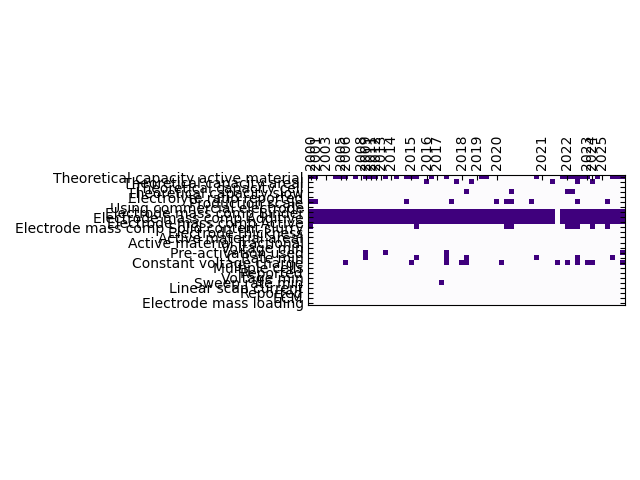

In [46]:
nmc_reporting = ReportingBinary(df, cathode_sort, "NMC")
fig, ax = nmc_reporting.make_heatmap("Purples")
plt.tight_layout()
# plt.savefig(os.path.join(save_path, "NMC_heatmap_reporting_Boolean.eps"), bbox_inches="tight")

Fix reporting_true line to accept numerical values (currently only takes boolean True)


<IPython.core.display.Javascript object>


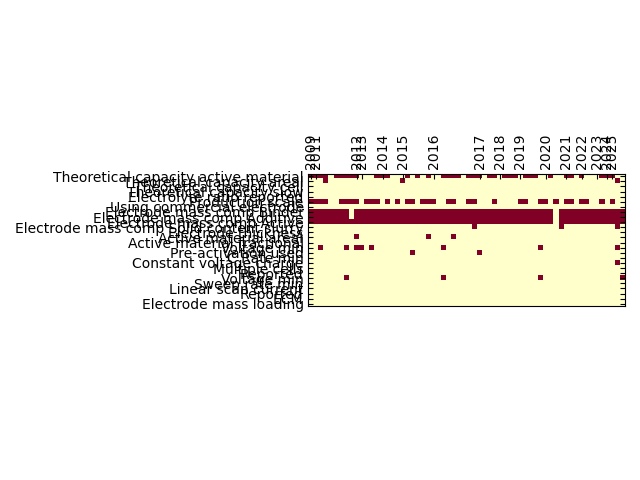

In [47]:
sulfur_reporting = ReportingBinary(df, cathode_sort, "Sulfur")
fig, ax = sulfur_reporting.make_heatmap(cmap="YlOrRd")
plt.tight_layout()
# plt.savefig(os.path.join(save_path, "Sulfur_heatmap_reporting_Boolean.eps"), bbox_inches="tight")

# Comparing frequency of characterisation method reporting

In [55]:
cathode_sort["Sulfur"][characterisation_df["SEM"]]

,Characterisation_Morphology:SEM:raw materials,Characterisation_Morphology:SEM:composite,Characterisation_Morphology:SEM:electrode,Characterisation_Morphology:SEM:in-situ/ operando,Characterisation_Morphology:SEM:post mortem/ ex-situ,Characterisation_Morphology:SEM+EDX:raw materials,Characterisation_Morphology:SEM+EDX:composite,Characterisation_Morphology:SEM+EDX:electrode,Characterisation_Morphology:SEM+EDX:in-situ/ operando,Characterisation_Morphology:SEM+EDX:post mortem/ ex-situ
2,FALSE,True,False,False,False,False,False,False,False,False
5,TRUE,True,False,False,False,False,False,False,False,False
6,TRUE,False,False,False,False,False,False,False,False,False
16,FALSE,False,False,False,False,False,False,False,False,False
18,FALSE,True,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
130,FALSE,False,True,False,False,False,False,False,False,False
131,TRUE,True,False,False,False,False,False,False,False,False
132,TRUE,False,False,False,False,False,False,False,False,False
138,True,True,False,False,False,False,False,False,False,False


In [57]:
cont_keyword?

In [61]:
characterisation_df = {"SEM": [name for name in df.columns if "Characterisation_Morphology:SEM" in name],
                       "XRD": [name for name in df.columns if "Characterisation_Structure:lab XRD" in name],
                       "XPS": [name for name in df.columns if "Characterisation_Structure:lab XPS" in name],
                       "XANES": [name for name in df.columns if "Characterisation_Structure:XANES" in name],
                       "XAS": [name for name in df.columns if "Characterisation_Structure:XAS" in name],
                       "TEM": [name for name in df.columns if "Characterisation_Morphology:TEM" in name],
                       "Optical": [name for name in df.columns if "Characterisation_Morphology:Optical" in name],
                       "FTIR": [name for name in df.columns if "Characterisation_Vibration:FTIR" in name],
                       "Raman": [name for name in df.columns if "Characterisation_Vibration:Raman" in name],
                       "BET": [name for name in df.columns if "Characterisation_Area porosity:BET" in name]}

materials_characterisation = dict([(material_keys, {}) for material_keys in cathode_sort.keys()])

for material_keys, material_values in cathode_sort.items():
    for char_keys, char_values in characterisation_df.items():
        try:
            load_bool = material_values[char_values].to_numpy(dtype=float)
            data_available_rows = np.all(np.isfinite(load_bool), axis=-1)
            materials_characterisation[material_keys].update([(char_keys, np.count_nonzero(np.any(load_bool[data_available_rows], axis=-1)))])
        except:
            print(char_values)
            
## to fix!!
for material_keys, material_values in cathode_sort.items():
    char_keys = "SEM"
    char_values = [name for name in df.columns if "Characterisation_Morphology:SEM" in name]
    load_bool = cont_keyword(material_values,
             keyword="True", column="Characterisation_Morphology:SEM:raw materials",
             case=False)
    materials_characterisation[material_keys].update([(char_keys, len(load_bool))])

['Characterisation_Morphology:SEM:raw materials', 'Characterisation_Morphology:SEM:composite', 'Characterisation_Morphology:SEM:electrode', 'Characterisation_Morphology:SEM:in-situ/ operando', 'Characterisation_Morphology:SEM:post mortem/ ex-situ', 'Characterisation_Morphology:SEM+EDX:raw materials', 'Characterisation_Morphology:SEM+EDX:composite', 'Characterisation_Morphology:SEM+EDX:electrode', 'Characterisation_Morphology:SEM+EDX:in-situ/ operando', 'Characterisation_Morphology:SEM+EDX:post mortem/ ex-situ']
['Characterisation_Morphology:SEM:raw materials', 'Characterisation_Morphology:SEM:composite', 'Characterisation_Morphology:SEM:electrode', 'Characterisation_Morphology:SEM:in-situ/ operando', 'Characterisation_Morphology:SEM:post mortem/ ex-situ', 'Characterisation_Morphology:SEM+EDX:raw materials', 'Characterisation_Morphology:SEM+EDX:composite', 'Characterisation_Morphology:SEM+EDX:electrode', 'Characterisation_Morphology:SEM+EDX:in-situ/ operando', 'Characterisation_Morpholo

<IPython.core.display.Javascript object>


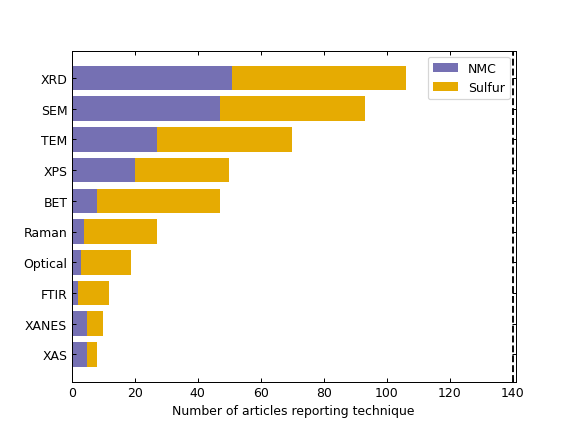

In [62]:
characterisation_by_material = dict([(name, dict([(keys, values[name]) 
                                                  for keys, values in materials_characterisation.items()]))
       for name in characterisation_df.keys()])

nmc_char_widths = [values["NMC"] for values in characterisation_by_material.values()]
lis_char_widths = [values["Sulfur"] for values in characterisation_by_material.values()]
char_totals = dict([(keys, np.sum([*values.values()]))
                    for keys, values in characterisation_by_material.items()])

hbar_order = [[*char_totals.keys()][idx] for idx in np.argsort([*char_totals.values()])]
# char_totals

fig, ax = plt.subplots()
nmc_characterisation = ax.barh(y=np.arange(len(characterisation_by_material)),
        width=[characterisation_by_material[hbar_name]["NMC"] for hbar_name in hbar_order],
                               label="NMC", color=nmc_color)

sulfur_characterisation = ax.barh(y=np.arange(len(characterisation_by_material)),
        width=[characterisation_by_material[hbar_name]["Sulfur"] for hbar_name in hbar_order],
                                left=nmc_characterisation.datavalues,
                                 label="Sulfur", color=lis_color)

ax.set_yticks(np.arange(len(characterisation_by_material)))
ax.set_yticklabels(hbar_order)

ax.legend()
ax.set_xlabel("Number of articles reporting technique")
ax.set_xlim([0, len(df)+1])
ax.axvline(len(df), color="k", ls="--")
# plt.savefig(os.path.join(save_path, "Characterisation_tech_summary.eps"), bbox_inches="tight")

In [71]:
save_path = r'C:\\Users\\Admin\\Dropbox\\Apps\\Overleaf\\Standardised reporting and characterisation - meta analysis\\figures'

<IPython.core.display.Javascript object>


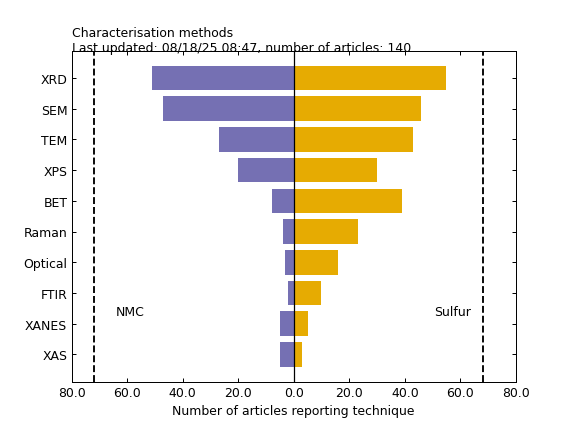

In [72]:
fig, ax = plt.subplots()
nmc_characterisation = ax.barh(y=np.arange(len(characterisation_by_material)),
        width=[-characterisation_by_material[hbar_name]["NMC"] for hbar_name in hbar_order],
                               label="NMC", color=nmc_color)

sulfur_characterisation = ax.barh(y=np.arange(len(characterisation_by_material)),
        width=[characterisation_by_material[hbar_name]["Sulfur"] for hbar_name in hbar_order],
#                                 left=nmc_characterisation.datavalues,
                                 label="Sulfur", color=lis_color)

ax.set_yticks(np.arange(len(characterisation_by_material)))
ax.set_yticklabels(hbar_order)

# ax.legend()
ax.annotate("Sulfur", (0.9, 0.2), xycoords=ax.transAxes, ha="right")
ax.annotate("NMC", (0.1, 0.2), xycoords=ax.transAxes, ha="left")

ax.set_xlabel("Number of articles reporting technique")
ax.set_xlim([-len(cathode_sort["NMC"])-1, len(cathode_sort["Sulfur"])+1])
ax.axvline(len(cathode_sort["Sulfur"]), color="k", ls="--")
ax.axvline(-len(cathode_sort["NMC"]), color="k", ls="--")

ax.axvline(0, color="k", lw=1)

ax.set_xticks(ax.get_xticks())
ax.set_xticklabels([abs(xlabel._x) for xlabel in ax.get_xticklabels()])

ax.annotate(figure_info(description="Characterisation methods"),
            (0, 1), xycoords=ax.transAxes)

plt.savefig(os.path.join(save_path, "Characterisation_tech_summary_symmetrical.eps"), bbox_inches="tight")
plt.savefig(os.path.join(save_path, "Characterisation_tech_summary_symmetrical.png"), bbox_inches="tight")

In [ ]:
[xlabel for xlabel in ax.get_xticklabels()][0]._x

# Change through time

In [ ]:
from matplotlib.ticker import MultipleLocator

In [ ]:
## finding range of dates
years_reported = np.unique(df["Article_Year"])

sort_by_year = [df.loc[df["Article_Year"]==year] for year in years_reported]

cathode_sort_by_year = dict([(keys, [values.loc[values["Article_Year"]==year] for year in years_reported])
      for keys, values in cathode_sort.items()])

fig, ax = plt.subplots()
nmc_year_bar = ax.bar(years_reported-0.2, [len(values) for values in cathode_sort_by_year["NMC"]], width=0.4, label="NMC", color=nmc_color)
sulfur_year_bar = ax.bar(years_reported+0.2, [len(values) for values in cathode_sort_by_year["Sulfur"]], width=0.4, label="sulfur", color=lis_color)
ax.legend()
ax.set_ylabel("Current number of papers included")
ax.yaxis.set_major_locator(MultipleLocator(1))
plt.savefig(os.path.join(save_path, "Number_of_papers_included_by_year.eps"), bbox_inches="tight")

# Numbers of papers published

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

## Notes
- Possibly re-run WOS search excluding 'anode' from title; excluding titanium from title, *excluding 'solid' from title!*

In [115]:
## search query:

'''

(((((((((ALL=(nickel AND manganese AND cobalt))
OR ALL=(NMC)) OR ALL=(NCM)) 
AND ALL=(battery)) NOT AB=(review)) 
NOT TI=(electrolyte OR separator OR interlayer OR coating)) 
NOT DT=(Review)) NOT TI=(recycl* OR reuse or "life cycle" OR recovery ))
NOT AB=(recycl* OR reuse OR "life cycle" OR recovery)) 
AND ALL=(electrochemical)

'''

nmc_wos_1_Excel = pd.ExcelFile(os.path.join("nmc_wos_records", "savedrecs.xls"))
nmc_wos_1 = nmc_wos_1_Excel.parse()

nmc_wos_2_Excel = pd.ExcelFile(os.path.join("nmc_wos_records", "savedrecs_1000_2000.xls"))
nmc_wos_2 = nmc_wos_2_Excel.parse()

nmc_wos_3_Excel = pd.ExcelFile(os.path.join("nmc_wos_records", "savedrecs_2000_2168.xls"))
nmc_wos_3 = nmc_wos_3_Excel.parse()

In [116]:
## sulfur publications
'''
(TI=("lithium-sulfur" OR "Li-S" OR "lithium-sulphur" OR "lithium sulfur" or "lithium sulphur" OR "Li S") NOT TI=(electrolyte OR separator OR interlayer OR coating) AND ALL=(electrochemical) NOT DT=(Review) AND AB=(cathode)) NOT (DT==("REVIEW"))
'''

lis_wos_1_Excel = pd.ExcelFile(os.path.join("lis_wos_records", "savedrecs.xls"))
lis_wos_1 = lis_wos_1_Excel.parse()

lis_wos_2_Excel = pd.ExcelFile(os.path.join("lis_wos_records", "savedrecs_1000_2000.xls"))
lis_wos_2 = lis_wos_2_Excel.parse()

lis_wos_3_Excel = pd.ExcelFile(os.path.join("lis_wos_records", "savedrecs_2000_2581.xls"))
lis_wos_3 = lis_wos_3_Excel.parse()

In [117]:
def txt_to_df(fname):
    data = []
    with open(fname) as f:
        for line in f.readlines():
            data.append(line.strip("\n").split("\t"))

    data_n = [line[:-1] for line in data[1:]]
    return pd.DataFrame(data_n, columns=data[0])

In [118]:
'''
(((((((((ALL=(nickel AND manganese AND cobalt)) OR ALL=(NMC)) OR ALL=(NCM) OR ALL=(spinel)) AND ALL=(battery)) NOT AB=(review)) NOT TI=(electrolyte OR separator OR interlayer OR coating)) NOT DT=(Review)) NOT TI=(recycl* OR reuse or "life cycle" OR recovery )) NOT AB=(recycl* OR reuse OR "life cycle" OR recovery)) AND ALL=(electrochemical)
'''

nmc_1 = txt_to_df(os.path.join("nmc_wos_records", "savedrecs_0-5000.txt"))
nmc_2 = txt_to_df(os.path.join("nmc_wos_records", "savedrecs_5000-8213.txt"))
wos_nmc = pd.concat([nmc_1, nmc_2], ignore_index=True)
wos_nmc["PY"] = pd.Series(wos_nmc["PY"], dtype=int)

In [119]:
wos_lis = pd.concat([lis_wos_1, lis_wos_2, lis_wos_3], ignore_index=True)

In [120]:
nmc_years_combined, nmc_counts = np.unique(wos_nmc["PY"], return_counts=True)
lis_years_combined, lis_counts = np.unique(wos_lis["Publication Year"], return_counts=True)

In [121]:
sulfur_key_dates = {2009: "Ji CMK-3 paper"}
nmc_key_dates = {1997: "Goodenough Cathode Materials for secondary (rechargeable) lithium batteries"}

nmc_key_dates_short = {1997: "Goodenough patent",
                       2000: "Paulsen 2000 Ni1/3Mn2/3O2",
                       2015: "Argonne patent \n # 10,305,103"}

lmo_key_dates = {1991: "Tarascon spinel phase paper"}

In [122]:
import matplotlib.patches as mpatches

<IPython.core.display.Javascript object>


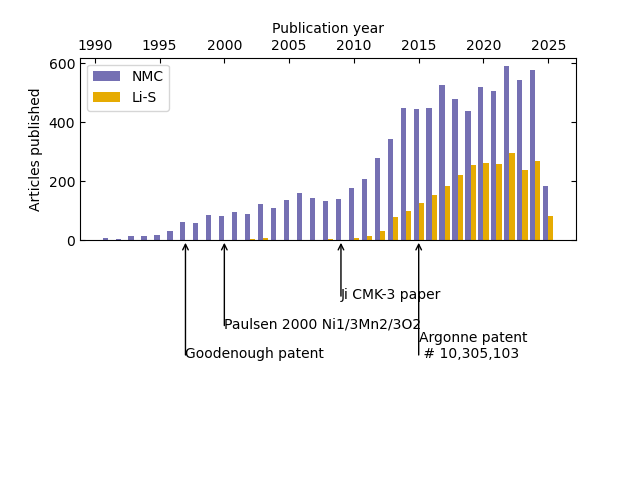

In [123]:
fig, ax = plt.subplots()
ax.bar(x=nmc_years_combined-0.2, height=nmc_counts, color=nmc_color, width=0.4, label="NMC")
ax.bar(x=lis_years_combined+0.2, height=lis_counts, color=lis_color, width=0.4, label="Li-S")
ax.set_xlabel("Publication year")
ax.xaxis.tick_top()
ax.xaxis.set_label_position("top")
ax.set_ylabel("Articles published")
fig.subplots_adjust(bottom=0.5)

ax.legend()

for keys, values in sulfur_key_dates.items():
    ax.annotate(text=values, xy=(keys, 0), xytext=(keys, -200), ha="left")
    ax.annotate(text="", xy=(keys, 0), xytext=(keys, -200), arrowprops=dict(arrowstyle="->"))
    
y_offset = [-400, -300, -400]
for nkv, (keys, values) in  enumerate(nmc_key_dates_short.items()):
    ax.annotate(text=values, xy=(keys, 0), xytext=(keys, y_offset[nkv]), ha="left")
    ax.annotate(text="", xy=(keys, 0), xytext=(keys, y_offset[nkv]), arrowprops=dict(arrowstyle="->"))
    
# plt.savefig(os.path.join(save_path, "Publication_years_and_patents.png"), bbox_inches="tight")

<IPython.core.display.Javascript object>


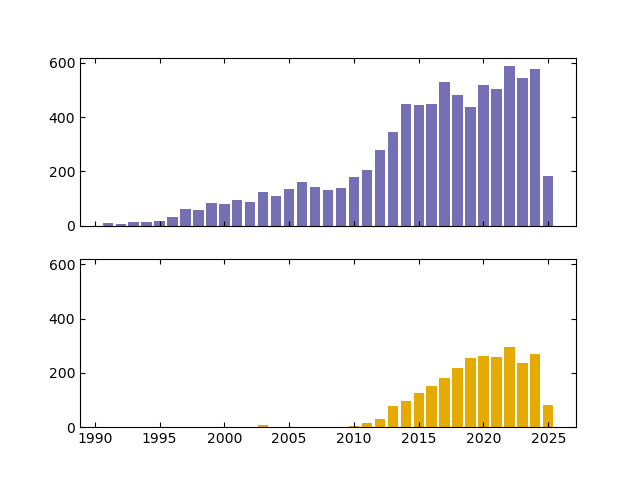

<BarContainer object of 22 artists>

In [124]:
fig, (axes) = plt.subplots(2, 1, sharey=True, sharex=True)
axes[0].bar(x=nmc_years_combined, height=nmc_counts, color=nmc_color)
axes[1].bar(x=lis_years_combined, height=lis_counts, color=lis_color)